In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import kstest, chisquare, chi2
from scipy.special import kolmogi

<AxesSubplot: >

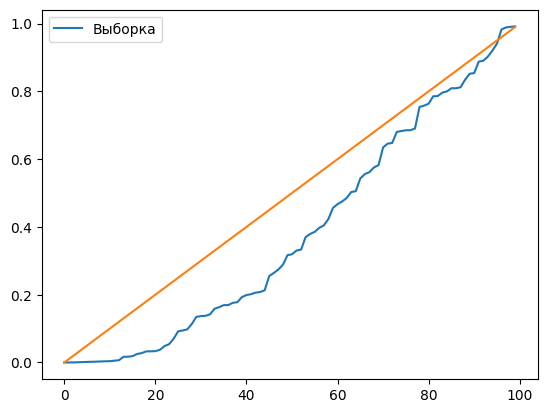

In [97]:
with open("csvs/Бабенко_Егор_Степанович.csv", "r") as csv:
    csvData = sorted(list(map(float, csv.readlines()[1:])))
N = len(csvData)
pd.DataFrame(csvData, columns=['Выборка']).plot()
pd.Series([x/100 for x in range(len(csvData))]).plot()

### Критерий Колмагорова
![image](https://studfile.net/html/2706/242/html_ovh47R4j6U.paDd/htmlconvd-QasmDu_html_b6262d446b8b4187.gif "Колмагоров")![image](https://studfile.net/html/2706/242/html_ovh47R4j6U.paDd/htmlconvd-QasmDu_html_8cb7542502d3b4d3.gif "Колмагоров")

![image](https://www.matematicus.ru/wp-content/uploads/2019/11/Kriterij-Kolmogorova-formula.png "Критерий Колмагорова")

In [98]:
sup = -1
sups = []
for ind, val in enumerate(csvData):
    sup = max(abs(ind/N - val), abs(ind/N+0.01 - val), sup)
    sups.append(sup)
kolmogorov = sup*sqrt(N)
kolmogorovScipy, kolmogorovPval = kstest(csvData, [x/N for x in range(N)])
print(f"Критерий Колмагорова: {round(kolmogorov, 5)}")
print(f"Критерий Колмагорова (scipy): {round(kolmogorovScipy, 5)}")
print(f"Критическое множество для критерия 0.1: >= {round(kolmogi(0.1), 5)}")
print(f"Критическое множество для критерия 0.01: >= {round(kolmogi(0.01), 5)}")
print(f"Критическое множество для критерия 0.001: >= {round(kolmogi(0.001), 5)}")
print(f"Является ли данная выборка равномерным распределеннием?\n\t\t{'Да' if kolmogorov < kolmogi(0.1) else 'Нет'} [При критерии 0.1]")

Критерий Колмагорова: 2.37057
Критерий Колмагорова (scipy): 0.23
Критическое множество для критерия 0.1: >= 1.22385
Критическое множество для критерия 0.01: >= 1.62762
Критическое множество для критерия 0.001: >= 1.94947
Является ли данная выборка равномерным распределеннием?
		Нет [При критерии 0.1]


![image](https://sun9-19.userapi.com/impf/1Ri0svWmF4xIHBaLnaoLwnnMc9C7j18QIcIeNQ/GGPLGQfqcFs.jpg?size=583x198&quality=96&sign=e3110566a59289994b8e15e9d58ccc43&type=album "Хи квадрат")

In [99]:
divisions_count = 20
xi = 0
histoVals,_ = np.histogram(csvData, divisions_count, (0,1))
for ind, val in enumerate(histoVals):
    ind+=1
    xi += (val - N/divisions_count)**2 / (N/divisions_count)

chisquareXi2, chisquarePVal = chisquare(histoVals)
print(f"Деление на {divisions_count} равных отрезков")
print(f"x2: {xi}")
print(f"x2 (scipy): {chisquareXi2}")

print(f"Критическое множество для критерия 0.1: >= {round(chi2.ppf(1-0.1, divisions_count-1), 5)}")
print(f"Критическое множество для критерия 0.01: >= {round(chi2.ppf(1-0.01, divisions_count-1), 5)}")
print(f"Критическое множество для критерия 0.001: >= {round(chi2.ppf(1-0.001, divisions_count-1), 5)}")
print(f"Является ли данная выборка равномерным распределеннием?\n\t\t{'Да' if xi < round(chi2.ppf(1-0.1, divisions_count-1), 5) else 'Нет'} [При критерии 0.1]")

Деление на 20 равных отрезков
x2: 78.4
x2 (scipy): 78.4
Критическое множество для критерия 0.1: >= 27.20357
Критическое множество для критерия 0.01: >= 36.19087
Критическое множество для критерия 0.001: >= 43.8202
Является ли данная выборка равномерным распределеннием?
		Нет [При критерии 0.1]


In [100]:
significance_level = 0.05 #Уровень значимости

print(f"Высчитанное P-значение (Колмагоров): {kolmogorovPval}")
print(f"Высчитанное P-значение (X2): {chisquarePVal}")

print(f"Является ли данная выборка равномерным распределением при уровне значимости {significance_level} по Колмагорову?\n\t\t{'Да' if kolmogorovPval > significance_level else 'Нет'}")
print(f"Является ли данная выборка равномерным распределением при уровне значимости {significance_level} по Пирсону?\n\t\t{'Да' if chisquarePVal > significance_level else 'Нет'}")


Высчитанное P-значение (Колмагоров): 0.009878183186176536
Высчитанное P-значение (X2): 3.503545230861266e-09
Является ли данная выборка равномерным распределением при уровне значимости 0.05 по Колмагорову?
		Нет
Является ли данная выборка равномерным распределением при уровне значимости 0.05 по Пирсону?
		Нет
